<a href="https://colab.research.google.com/github/simonaron1111/GA_algoritmusok/blob/main/Simon_%C3%81ron_GA_TSP_gyakorlo_feladat_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# BIOINFORMATIKA - TSP – Genetikus algoritmus
**Feladat:** Traveling Salesman Problem (TSP)  

*   **Reprezentáció:** permutáció (városok sorrendje)
*   **Fitness:** –úthossz (mert a GA maximál, mi minimalizálnánk)


**GA-lépések:**
*  Szelekció: tournament
*  Keresztezés: OX/PMX
*  Mutáció swap/inversion
*  Visszahelyezés: generációs + elitizmus

**Grafikonok:**
* tanulási görbe (legjobb és átlag út hossza generációnként),
* a legjobb útvonal rajza (városok pontként, kör útvonallal).


Gyakorló feladatok


## FELADAT (könnyű) - Távolságmátrix és útvonalhossz

Írj egy függvényt, amely:

bemenet:
* coords: lista (vagy NumPy tömb) városokkal, pl. [(x1, y1), (x2, y2), ...]

kimenet:
* dist_matrix: kétdimenziós lista vagy NumPy tömb, ahol dist_matrix[i][j] az i. és j. város távolsága (euklideszi)

In [1]:
import math

def distance(point1, point2):
  x = point1[0] - point2[0]
  y = point1[1] - point2[1]
  return math.sqrt(x*x + y*y)

def distance_matrix(coords):
  N = len(coords)
  return [[distance(coords[i], coords[j]) for j in range(N)] for i in range(N)]

def tour_length(tour, dist_matrix):
    """
    tour: pl. [0, 3, 1, 2, 4] – városindex-permutáció
    dist_matrix: NxN távolságmátrix
    Vissza: körút teljes hossza (visszatérés az első városba is).
    """
    if len(tour) == 0:
      return 0
    distance = 0
    for i in range(len(tour)-1):
      distance += dist_matrix[tour[i]][tour[i+1]]

    return distance + dist_matrix[tour[-1]][tour[0]]

In [13]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def visualize_tour_with_coords(tour, coords, tour_length=None, title=None):
    """
    NetworkX directed graph visualisation
    tour: List of city indices (e.g., [0, 2, 1, 3])
    coords: List or Array of (x, y) tuples for every city
    """
    n_cities = len(coords)

    G = nx.DiGraph()

    for i in range(n_cities):
        G.add_node(i, pos=coords[i])

    tour_edges = list(zip(tour, tour[1:] + tour[:1]))
    G.add_edges_from(tour_edges)

    pos = nx.get_node_attributes(G, 'pos')

    plt.figure(figsize=(10, 8))

    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)

    nx.draw_networkx_labels(G, pos)

    nx.draw_networkx_edges(G, pos, edgelist=tour_edges,
                           edge_color='red', arrows=True, arrowstyle='-|>', arrowsize=20, width=2)

    if title == None:
      title = "TSP Tour Visualization"
    if tour_length:
        title += f"\nTotal Length: {tour_length:.2f}"

    plt.title(title)
    plt.axis('equal')
    plt.show()

## FELADAT (könnyű) - Véletlen permutáció és swap mutáció

Írj két függvényt:
* random_tour(n)
* swap_mutation(tour)

*   List item
*   List item



majd

Futtasd le a swap_mutation-t néhányszor, és ellenőrizd, hogy:
* a permutáció hossza nem változik
* minden város továbbra is pontosan egyszer szerepel

In [7]:
import random
import numpy as np

def random_tour(n):
    """Adjon vissza egy véletlen permutációt 0..n-1 között."""
    return np.random.choice(range(n), size=n, replace=False)

def swap_mutation(tour):
    """
    Válassz ki véletlenszerűen két pozíciót a tour-ban és cseréld meg őket.
    Visszatér: új (mutált) tour.
    """
    N = len(tour)
    i = random.randint(0, N-1)
    j = random.randint(0, N-1)
    while i == j:
      j = random.randint(0, N-1)
    tour[i], tour[j] = tour[j], tour[i]
    return tour


initial_tour = random_tour(5)
print(initial_tour)
for i in range(5):
  initial_tour = swap_mutation(initial_tour)
  print(f'megmaradt a hossz: {len(initial_tour) == 5}')
  print(f'megmaradtak az elemek: {len(set(initial_tour)) == 5}')


[2 3 0 4 1]
megmaradt a hossz: True
megmaradtak az elemek: True
megmaradt a hossz: True
megmaradtak az elemek: True
megmaradt a hossz: True
megmaradtak az elemek: True
megmaradt a hossz: True
megmaradtak az elemek: True
megmaradt a hossz: True
megmaradtak az elemek: True


## FELADAT (könnyű) - Inversion mutáció

Írj egy inversion_mutation függvényt:
* inversion_mutation(tour)

majd

Teszteld:
* rajzold ki (akár textben) az eredeti és mutált tour-t
* számold ki a tour hosszát mutáció előtt/után ugyanazzal a dist_matrix-szel

In [36]:
def inversion_mutation(tour):
    """
    Válassz ki két indexet i < j.
    Fordítsd meg a tour i..j közti szakaszát.
    Példa: [0, 1, 2, 3, 4, 5], i=1, j=4 → [0, 4, 3, 2, 1, 5]
    """
    N = len(tour)
    i = random.randint(1, N-2)
    j = random.randint(i+1, N-1)
    while i >= j:
      i = random.randint(1, N-2)
      j = random.randint(i+1, N-1)
    return np.concatenate((tour[:i], tour[i:j][::-1], tour[j:]))

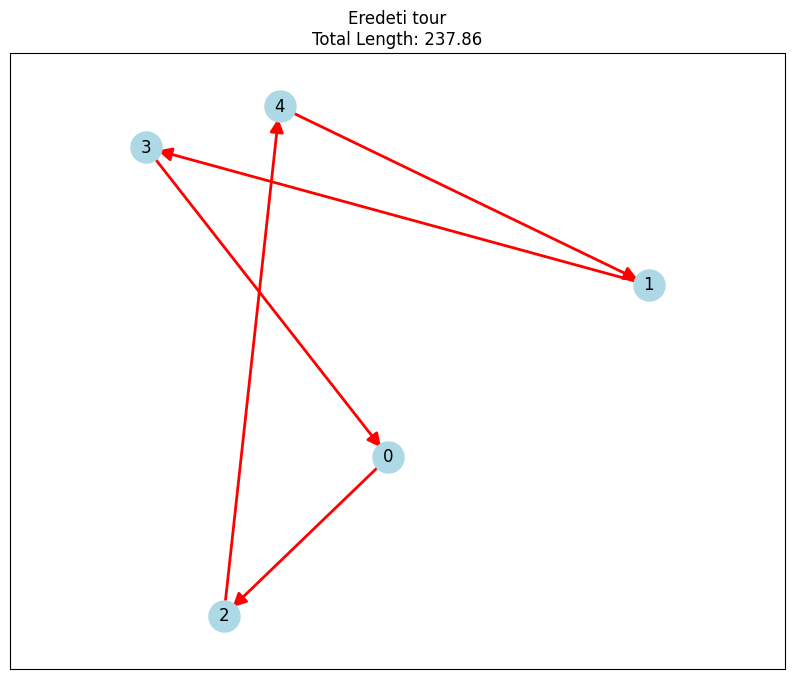

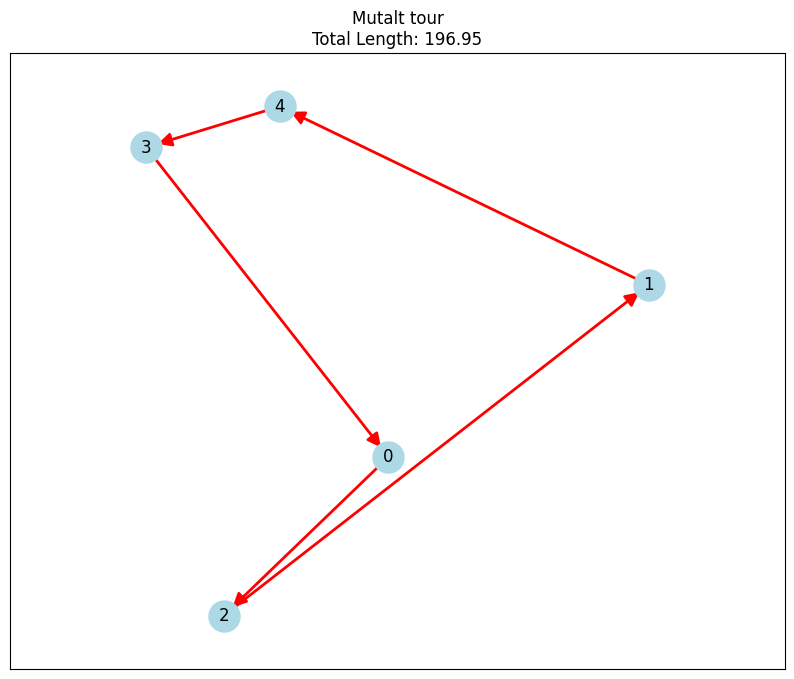

In [23]:
coords = np.random.rand(5, 2) * 100
tour = [0, 2, 4, 1, 3]
dist_matrix = distance_matrix(coords)

visualize_tour_with_coords(tour, coords, tour_length(tour, dist_matrix), 'Eredeti tour')

mutated_tour = inversion_mutation(tour)
visualize_tour_with_coords(mutated_tour, coords, tour_length(mutated_tour, dist_matrix), 'Mutalt tour')

## FELADAT (Közepes) - GA inicializáció és egyszerű futtatás

Készíts:
* init_population(pop_size, n_cities)
* fitness(tour, dist_matrix)

Majd

Majd futtass egy nagyon egyszerű GA-t:
* populáció generálása
* minden generációban:
  * csak mutáció (swap vagy inversion), pl. minden egyedet kis valószínűséggel
  * új populáció értékelése
* futtass 50–100 generációt
* rajzold ki: generációnkénti legjobb tour hossz (vagy fitness)

In [25]:
def init_population(pop_size, n_cities):
    """pop_size darab véletlen permutációból álló kezdeti populáció."""
    return [random_tour(n_cities) for i in range(pop_size)]

def fitness(tour, dist_matrix):
    """Lehet pl. -tour_length (minimálásból max-olás)."""
    return -tour_length(tour, dist_matrix)

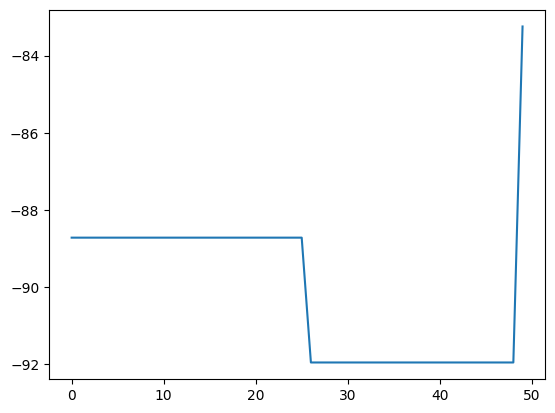

In [79]:
POP_SIZE = 20
GENERATIONS = 50
MUTATION_RATE = 0.05
N = 20
coords = np.random.rand(N, 2) * 10

def mutate(tour):
  if random.random() < MUTATION_RATE:
    return inversion_mutation(tour)
  return tour

def ga():
  pop = init_population(POP_SIZE, N)
  dist_matrix = distance_matrix(coords)
  fitness_history = []
  for gen in range(GENERATIONS):
    fitnesses = [fitness(tour, dist_matrix) for tour in pop]
    best_fitness = max(fitnesses)
    fitness_history.append(best_fitness)

    new_pop = [mutate(tour) for tour in pop]
    pop = new_pop

  return fitness_history

fitness_history = ga()
plt.plot(fitness_history)



## FELADAT (Közepes) - Crossover egyedekre (OX/PMX)

Implementálj egy TSP-kompatibilis keresztezőt (pl. OX vagy PMX):
* ox_crossover(parent1, parent2)

Feladatok:
* generálj 2 szülőt
* készíts 2 utódot
* ellenőrizd, hogy mindkét utód érvényes permutáció (minden város egyszer szerepel)
* mérd a szülők és utódok tour hosszát, írd ki összehasonlításként

In [40]:
def ox_crossover(parent1, parent2):
    """Order Crossover (OX) TSP permutációkra."""
    size = len(parent1)
    child = np.full(size, -1)

    start, end = sorted(np.random.choice(range(size), 2, replace=False))

    child[start:end+1] = parent1[start:end+1]

    current_pos = (end + 1) % size

    for i in range(size):
        p2_gene_index = (end + 1 + i) % size
        gene = parent2[p2_gene_index]

        if gene not in child:
            child[current_pos] = gene
            current_pos = (current_pos + 1) % size

    return child

parent1 = random_tour(5)
parent2 = random_tour(5)

child1 = ox_crossover(parent1, parent2)
child2 = ox_crossover(parent1, parent2)

print(f'elso gyerek ervenyes: {len(child1) == 5 and len(set(child1)) == 5}')
print(f'masodik gyerek ervenyes: {len(child2) == 5 and len(set(child2)) == 5}')

print(f'szulo1: {tour_length(parent1, dist_matrix)}')
print(f'szulo2: {tour_length(parent2, dist_matrix)}')
print(f'gyerek1: {tour_length(child1, dist_matrix)}')
print(f'gyerek2: {tour_length(child2, dist_matrix)}')

elso gyerek ervenyes: True
masodik gyerek ervenyes: True
szulo1: 251.48823592472678
szulo2: 218.32829874917337
gyerek1: 242.12360717058445
gyerek2: 251.48823592472678


## FELADAT (Közepes) - Swap vs. Inversion – összehasonlító kísérlet

Készíts kódot, amely:
* ugyanazzal a GA-val (populációméret, generációszám, szelekció, crossover)
* két külön futtatást végez:
   * (a) csak swap_mutation
   * (b) csak inversion_mutation
* minden esetben többször (pl. 10–20 run) lefuttatod
* összehasonlítod:
   * átlagos legjobb tour hossz
   * szórás

Írj rövid következtetést:
* Melyik mutáció „stabilabb”?
* Van-e különbség a konvergencia sebességében?

In [88]:
def ga():
  pop = init_population(POP_SIZE, N)
  dist_matrix = distance_matrix(coords)
  fitness_history = []
  for gen in range(GENERATIONS):
    fitnesses = [fitness(tour, dist_matrix) for tour in pop]
    best_fitness = max(fitnesses)
    fitness_history.append(best_fitness)
    relative_fitnesses = (0 - np.array(fitnesses))
    weights = relative_fitnesses / sum(relative_fitnesses)
    new_pop = []
    for i in range(POP_SIZE):
      parent_indices = np.random.choice(len(pop), p=weights, size=2, replace=False)
      p1 = pop[parent_indices[0]]
      p2 = pop[parent_indices[1]]
      child = mutate(ox_crossover(p1, p2))
      new_pop.append(child)

    pop = new_pop

  return fitness_history

atlag swap mutationnel: -71.05350827334959, szoras: 6.380881804512858
atlag inversion mutationnel: -75.86304035396043, szoras: 4.344663827839919


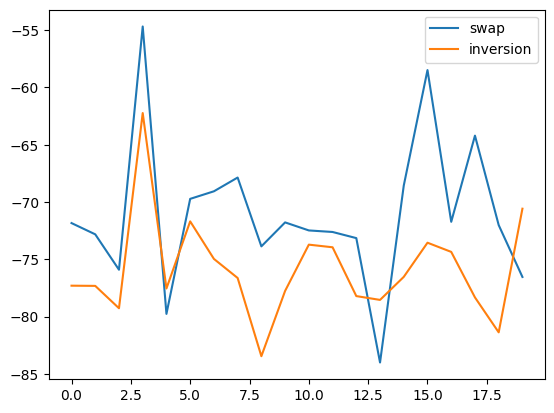

In [90]:
# eloszor a swap mutation
def mutate(tour):
  if random.random() < MUTATION_RATE:
    return swap_mutation(tour)
  return tour

best_fitnesses = []

for i in range(20):
  fitness_history = ga()
  best_fitnesses.append(max(fitness_history))

print(f'atlag swap mutationnel: {sum(best_fitnesses) / 20}, szoras: {np.std(best_fitnesses)}')
plt.plot(best_fitnesses)
# most az inversion_mutation

def mutate(tour):
  if random.random() < MUTATION_RATE:
    return inversion_mutation(tour)
  return tour

best_fitnesses = []

for i in range(20):
  fitness_history = ga()
  best_fitnesses.append(max(fitness_history))

print(f'atlag inversion mutationnel: {sum(best_fitnesses) / 20}, szoras: {np.std(best_fitnesses)}')
plt.plot(best_fitnesses)
plt.legend(['swap', 'inversion'])

In [ ]:
# jo sok futtatas alapjan, az inverzios stabilabb, azaz kevesbe megy el teljesen kulonbozo iranyokba
# a konvergenciat kb ugyanolyannak latom mindkettonel, ha szerencseje van a swapnak akkor az gyorsabban eler egy jobbat

# FELADAT (Nehéz) - érzékenységi vizsgálat és hibrid mutáció

Készíts olyan GA-t, amely:
* egyszerre használ swap + inversion mutációt: pl. minden mutáció-lépésnél:
   * 50% eséllyel swap_mutation
   * 50% eséllyel inversion_mutation

Feladatok:
1. **Válaszd ki a paramétereket:**
  * populációméret
  * mutációs ráta
  * generációk száma

2. **Használj legalább 20 városból álló TSP példát**.
3. **Készíts kísérleti tervet három mutációs stratégiára**:
  * csak swap
  * csak inversion
  * kevert swap+inversion
4. **Minden konfigurációt futtasd le legalább 20x**.
5. **Gyűjtsd ki**:
  * átlagos legjobb tour hossz
  * legjobb elért tour
  * konvergenciagörbéket (átlagolt fitness / generáció)
6. **Írj rövid rövid elemzést**:
  * melyik stratégia adott jobb eredményt
  *  hogyan hat a mutáció típusa a keresés jellegére (finomhangolás vs. nagy ugrások)

atlag swap mutationnel: -75.14827386842411, legjobb: -65.98395167055611
atlag inversion mutationnel: -72.66904348478629, legjobb: -63.618255097375034
atlag hibrid mutationnel: -74.52812764431079, legjobb: -58.69211080592003


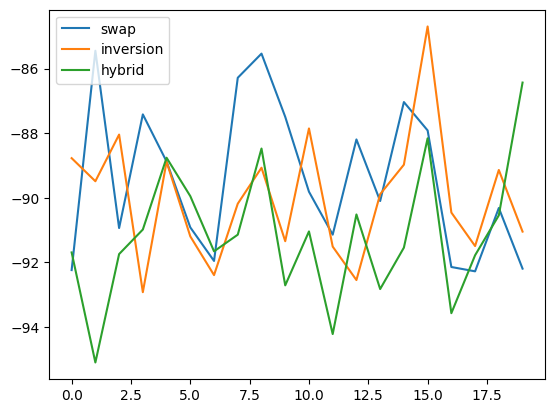

In [91]:
# eloszor a swap mutation
def mutate(tour):
  if random.random() < MUTATION_RATE:
    return swap_mutation(tour)
  return tour

best_fitnesses = []
avg_fitnesses = []

for i in range(20):
  fitness_history = ga()
  best_fitnesses.append(max(fitness_history))
  avg_fitnesses.append(sum(fitness_history) / len(fitness_history))

print(f'atlag swap mutationnel: {sum(best_fitnesses) / 20}, legjobb: {max(best_fitnesses)}')
plt.plot(avg_fitnesses)
# most az inversion_mutation

def mutate(tour):
  if random.random() < MUTATION_RATE:
    return inversion_mutation(tour)
  return tour

best_fitnesses = []
avg_fitnesses = []

for i in range(20):
  fitness_history = ga()
  best_fitnesses.append(max(fitness_history))
  avg_fitnesses.append(sum(fitness_history) / len(fitness_history))

print(f'atlag inversion mutationnel: {sum(best_fitnesses) / 20}, legjobb: {max(best_fitnesses)}')
plt.plot(avg_fitnesses)

# most a hibrid

def mutate(tour):
  if random.random() < MUTATION_RATE:
    return  swap_mutation(tour) if random.random() < 0.5 else inversion_mutation(tour)
  return tour

best_fitnesses = []
avg_fitnesses = []

for i in range(20):
  fitness_history = ga()
  best_fitnesses.append(max(fitness_history))
  avg_fitnesses.append(sum(fitness_history) / len(fitness_history))

print(f'atlag hibrid mutationnel: {sum(best_fitnesses) / 20}, legjobb: {max(best_fitnesses)}')
plt.plot(avg_fitnesses)

plt.legend(['swap', 'inversion', 'hybrid'])

In [ ]:
# a hibrid strategia adott a legjobb eredmenyt
# meg mindig az inverzio tunik a legstabilabbnak
# a swap a leg erratikusabb, a hibrid egy jo balance a ketto kozott